In [31]:
import pandas as pd
import numpy as np

# Generate synthetic data
np.random.seed(0)
num_students = 1000

# Generating student IDs
student_ids = np.arange(1, num_students + 1)

# Generating random student attributes
age = np.random.randint(18, 25, num_students)
gender = np.random.choice(['Male', 'Female'], num_students)
test_scores = np.random.normal(70, 10, num_students)
hours_studied = np.random.randint(1, 10, num_students)
class_attendance = np.random.uniform(0.7, 1, num_students)

# Creating DataFrame
academic_data = pd.DataFrame({
    'student_id': student_ids,
    'age': age,
    'gender': gender,
    'test_scores': test_scores,
    'hours_studied': hours_studied,
    'class_attendance': class_attendance
})

# Saving DataFrame to CSV
academic_data.to_csv('academic_performance.csv', index=False)

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import boxcox

In [34]:
academic_data = pd.read_csv('academic_performance.csv')
print(academic_data.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   student_id        1000 non-null   int64  
 1   age               1000 non-null   int64  
 2   gender            1000 non-null   object 
 3   test_scores       1000 non-null   float64
 4   hours_studied     1000 non-null   int64  
 5   class_attendance  1000 non-null   float64
dtypes: float64(2), int64(3), object(1)
memory usage: 47.0+ KB
None


In [35]:
missing_values = academic_data.isnull().sum()
print("Columns with missing values:\n", missing_values[missing_values > 0])

Columns with missing values:
 Series([], dtype: int64)


In [36]:
numeric_cols = academic_data.select_dtypes(include=[np.number]).columns
academic_data[numeric_cols] = academic_data[numeric_cols].fillna(academic_data[numeric_cols].mean())

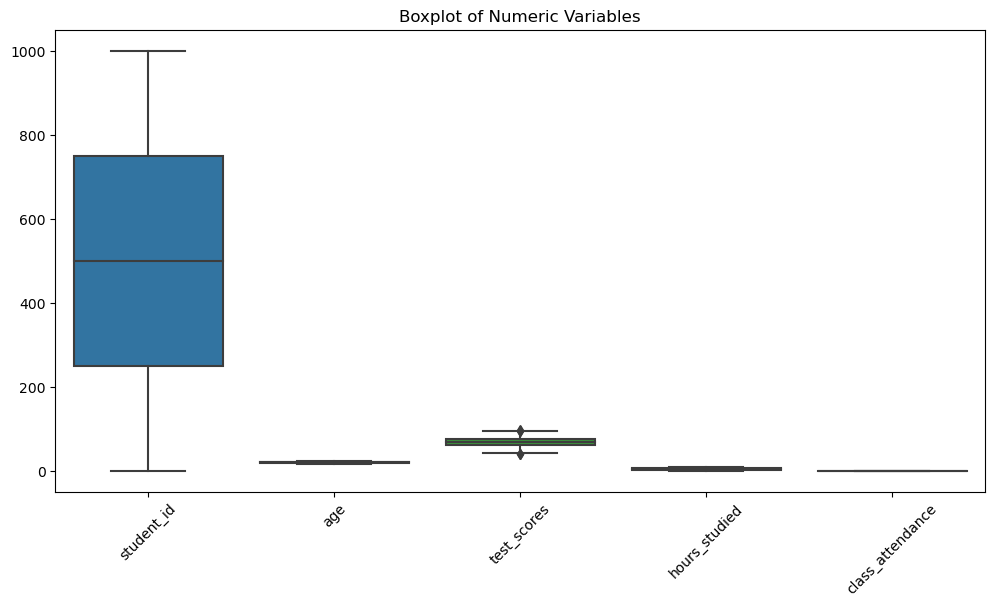

In [42]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=academic_data[numeric_cols])
plt.title("Boxplot of Numeric Variables")
plt.xticks(rotation=45)
plt.show()

In [43]:
from scipy.stats import zscore

z_scores = zscore(academic_data[numeric_cols])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
academic_data = academic_data[filtered_entries]

In [44]:
test_scores_transformed, _ = boxcox(academic_data['test_scores'])

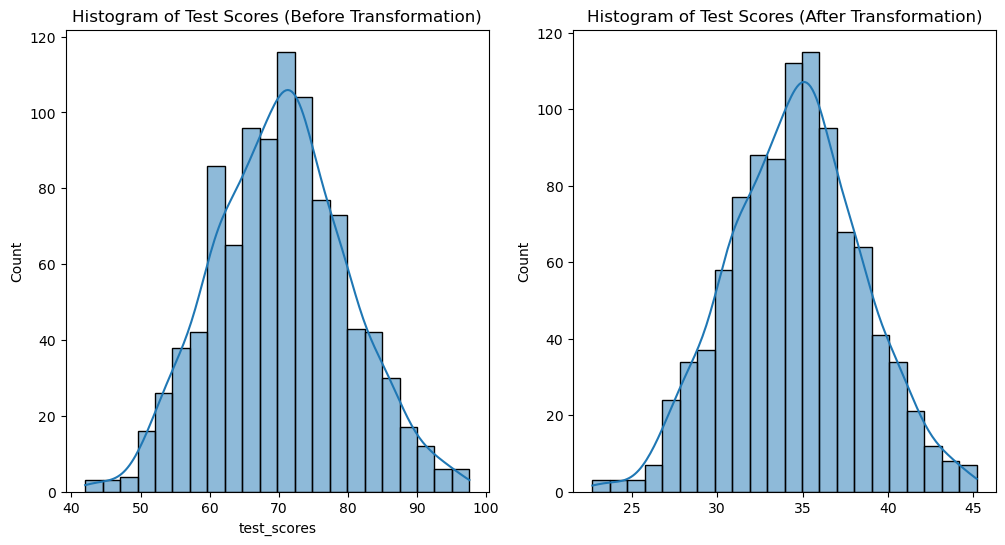

In [48]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(academic_data['test_scores'], kde=True)
plt.title("Histogram of Test Scores (Before Transformation)")

plt.subplot(1, 2, 2)
sns.histplot(test_scores_transformed, kde=True)
plt.title("Histogram of Test Scores (After Transformation)")
plt.show()